In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
num = 1000

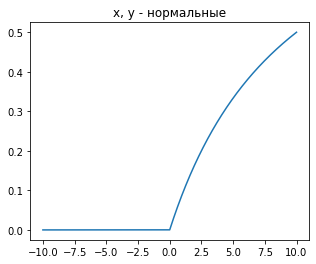

In [16]:
pears_corr = []
for i in range(10000):
    x = sc.norm.rvs(0, 1, num)
    y = sc.norm.rvs(0, 1, num)
    pears_corr.append(sc.stats.pearsonr(x, y)[0])
plt.figure(figsize = (5,4))
pears_corr.sort()
x1 = np.linspace(-10, 10 , 10000)
y = np.array([1 if pears_corr[i] < x1[i] else 0 for i in range(10000)])
y = np.cumsum(y) / (np.array(range(10000)) + 1)
plt.plot(x1, y)
plt.title('x, y - нормальные')
plt.show()

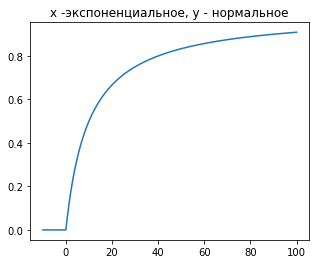

In [22]:
pears_corr = []
for i in range(10000):
    x = sc.expon.rvs(0, 1, num)
    y = sc.norm.rvs(0, 1, num)
    pears_corr.append(sc.stats.pearsonr(x, y)[0])
plt.figure(figsize = (5,4))
x1 = np.linspace(-10, 100 , 10000)
y = np.array([1 if pears_corr[i] < x1[i] else 0 for i in range(10000)])
y = np.cumsum(y) / (np.array(range(10000)) + 1)
plt.plot(x1, y)
plt.title('x -экспоненциальное, y - нормальное')
plt.show()

In [10]:
np.cumsum(pears_corr) / y

array([ 1.64715120e-03, -1.09359726e-02,  6.61464333e-05, ...,
        7.93097765e-04,  7.94993491e-04,  7.94050245e-04])

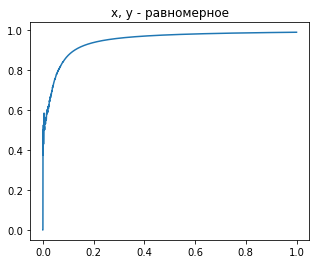

In [17]:
pears_corr = []
for i in range(10000):
    x = sc.uniform.rvs(0, 1, num)
    y = sc.uniform.rvs(0, 1, num)
    pears_corr.append(sc.stats.pearsonr(x, y)[0])
plt.figure(figsize = (5,4))
x1 = np.linspace(0, 1 , 10000)
y = np.array([1 if pears_corr[i] < x1[i] else 0 for i in range(10000)])
y = np.cumsum(y) / (np.array(range(10000)) + 1)
plt.plot(x1, y, label = 'ЭФР')
plt.title('x, y - равномерное')
plt.show()

## Посчитать коэффициенты Спирмена и Кэнделла

In [85]:
kend_pvalue = []
sp_pvalue = []

Для равномерного распределения на кольце $\{(x,y):\: 1\leq x^2+y^2 \leq 1.5\}$

In [86]:
r = sc.uniform.rvs(loc=1,scale=np.sqrt(0.5),size=500)
phi=sc.uniform.rvs(scale=2*np.pi,size=500)
x = r * np.cos(phi)
y = r * np.sin(phi)
sp_pvalue.append(sc.stats.spearmanr(x, y)[1])
kend_pvalue.append(sc.stats.kendalltau(x, y)[1])
print('Коэффициент Спирмена: '+ str(sc.stats.spearmanr(x, y)[0]))
print('Коэффициент Кэнделла: '+ str(sc.stats.kendalltau(x, y)[0]))

Коэффициент Спирмена: -0.030832923331693324
Коэффициент Кэнделла: -0.01640080160320641


Для координат выборки распределения с плотностью $(x+y)I_{x,y\in [0,1]}$

In [87]:
r = sc.uniform.rvs(0, 1, 500)
x = (-1 / 2 + np.sqrt(1 + 8 * r) / 2)
r = sc.uniform.rvs(0, 1, 500)
y = (1 - 2 * x) / 2 + np.sqrt((2 * x - 1) ** 2 + 4 * r * (2 * x + 1))/2
sp_pvalue.append(sc.stats.spearmanr(x, y)[1])
kend_pvalue.append(sc.stats.kendalltau(x, y)[1])
print('Коэффициент Спирмена: '+ str(sc.stats.spearmanr(x, y)[0]))
print('Коэффициент Кэнделла: '+ str(sc.stats.kendalltau(x, y)[0]))

Коэффициент Спирмена: -0.4204884979539918
Коэффициент Кэнделла: -0.2902765531062124


In [88]:
x = sc.norm.rvs(0, 1, num)
u = sc.norm.rvs(0, 1, num)
y = x ** 2 - 2 * x + u 
sp_pvalue.append(sc.stats.spearmanr(x, y)[1])
kend_pvalue.append(sc.stats.kendalltau(x, y)[1])
print('Коэффициент Спирмена: '+ str(sc.stats.spearmanr(x, y)[0]))
print('Коэффициент Кэнделла: '+ str(sc.stats.kendalltau(x, y)[0]))

Коэффициент Спирмена: -0.7783618361836182
Коэффициент Кэнделла: -0.6028282828282829


In [93]:
df = pd.DataFrame({
...     'Коэффициент Спирмена': sp_pvalue,
...     'Коэффициент Кэнделла': kend_pvalue
... }, index = ['равномерное на кольце', '(x+y)I(x,y \in [0,1])', 'x = norm(0,1), y = x ** 2 - 2x + norm(0,1)'])
df

,Коэффициент Спирмена,Коэффициент Кэнделла
равномерное на кольце,4.915264e-01,5.835680e-01
"(x+y)I(x,y \in [0,1])",7.670870e-23,2.950513e-22
"x = norm(0,1), y = x ** 2 - 2x + norm(0,1)",1.580610e-21,6.295040e-19
